In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



Импорт данных

In [229]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

Map_1 = pd.DataFrame(import_dataset_from_file('Map_1.txt'))
Map_2 = pd.DataFrame(import_dataset_from_file('Map_2.txt'))
Map_3 = pd.DataFrame(import_dataset_from_file('Map_3.txt'))
Map_4 = pd.DataFrame(import_dataset_from_file('Map_4.txt'))
Map_5 = pd.DataFrame(import_dataset_from_file('Map_5.txt'))
Point_dataset = pd.DataFrame(import_dataset_from_file('Point_dataset.txt'))

In [230]:
Map_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196495 entries, 0 to 1196494
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196495 non-null  float64
 1   y       1196495 non-null  float64
 2   z       1196495 non-null  float64
dtypes: float64(3)
memory usage: 27.4 MB


In [231]:
Point_dataset

,x,y,z
0,44222.21,35600.90,14.97
1,60003.40,26172.72,14.08
2,44300.61,35291.79,14.26
3,52776.47,33453.18,15.35
4,49636.39,30697.34,14.42
...,...,...,...
436,65193.40,26832.74,9.37
437,50022.04,40606.42,7.64
438,43745.18,35114.25,14.62
439,71483.43,25152.76,11.01


In [232]:

def make_map(dataset):
    x = dataset['x']
    y = dataset['y']
    z = dataset['z']
    plt.scatter(x, y, c=z)
    plt.colorbar(label='z')
    plt.show()

#make_map(Map_1), make_map(Map_2), make_map(Map_3), make_map(Map_4), make_map(Map_5) # долго капец

Map_1 = Map_1.rename(columns={'z': 'z1'})
Map_2 = Map_2.rename(columns={'z': 'z2'})
Map_3 = Map_3.rename(columns={'z': 'z3'})
Map_4 = Map_4.rename(columns={'z': 'z4'})
Map_5 = Map_5.rename(columns={'z': 'z5'})

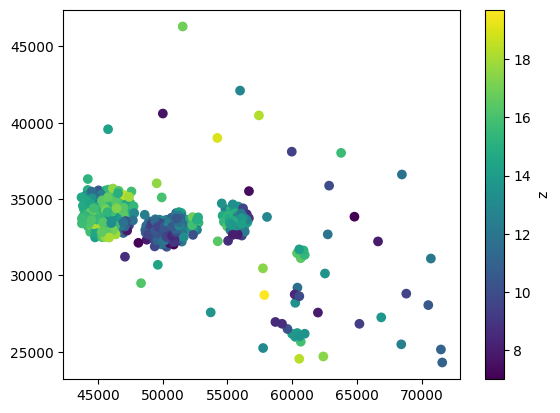

In [233]:
make_map(Point_dataset)

In [234]:
Point_dataset

,x,y,z
0,44222.21,35600.90,14.97
1,60003.40,26172.72,14.08
2,44300.61,35291.79,14.26
3,52776.47,33453.18,15.35
4,49636.39,30697.34,14.42
...,...,...,...
436,65193.40,26832.74,9.37
437,50022.04,40606.42,7.64
438,43745.18,35114.25,14.62
439,71483.43,25152.76,11.01


In [235]:
data = pd.merge(Map_1, Map_2, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_3, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_4, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_5, left_on=['x', 'y'], right_on=['x', 'y'])
print(data)
data1 = pd.merge(data, Point_dataset, how='outer', left_on=['x', 'y'], right_on=['x', 'y']) # это удалить надо будет
print(data1, data1.info())
# data и Point_dataset не имеют пересекающихся точек x, y

               x        y   z1   z2    z3      z4   z5
0       68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68
1       68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68
2       68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68
3       68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68
4       68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68
...          ...      ...  ...  ...   ...     ...  ...
1196458 53239.21 46942.00 0.17 0.11 41.70 4022.73 1.68
1196459 53251.71 46942.00 0.17 0.11 37.71 4022.96 1.68
1196460 53264.21 46942.00 0.17 0.11 37.66 4022.32 1.68
1196461 53276.71 46942.00 0.17 0.11 37.21 4023.46 1.68
1196462 53289.21 46942.00 0.17 0.11 40.99 4016.93 1.68

[1196463 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196904 entries, 0 to 1196903
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196904 non-null  float64
 1   y       1196904 non-null  float64
 2   z1      1196463 non-null  float64
 3   

In [236]:
data

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68
...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68


In [237]:
columns = ['x', 'y', 'z1', 'z2', 'z3', 'z4', 'z5']
for i in columns:
    data[i] = data[i].astype(np.float32)
data

for i in columns:
    print(i,'min', data[i].min(), 'max', data[i].max(), 'median', data[i].median() )
    print('mean', data[i].mean(), 'std', data[i].std())



x min 43839.21 max 72439.21 median 56526.71
mean 57077.184 std 7318.7754
y min 24467.0 max 46942.0 median 33767.0
mean 34368.668 std 5390.9194
z1 min 0.10728 max 0.2996 median 0.15452
mean 0.15573128 std 0.012026057
z2 min 0.07695 max 0.1623 median 0.12236
mean 0.123908356 std 0.0111217555
z3 min 26.05318 max 51.06692 median 37.62269
mean 37.872723 std 2.2727215
z4 min 3461.601 max 4517.0317 median 4189.403
mean 4180.0293 std 64.43013
z5 min 1.66369 max 1.70829 median 1.67706
mean 1.6771472 std 0.0043331175


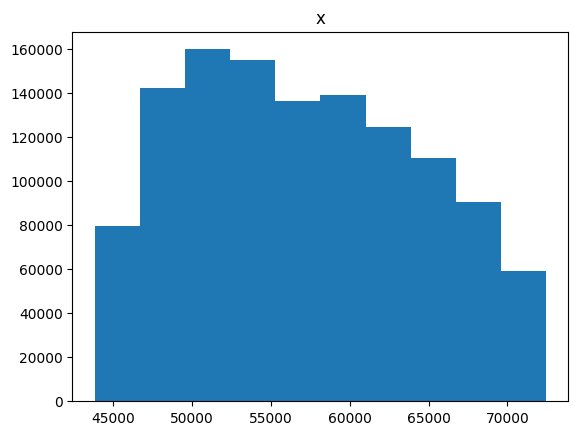

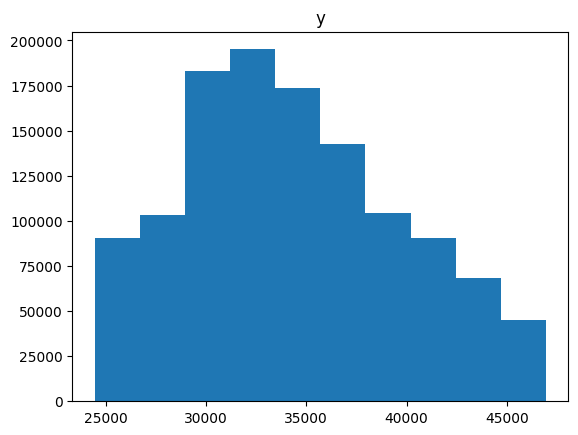

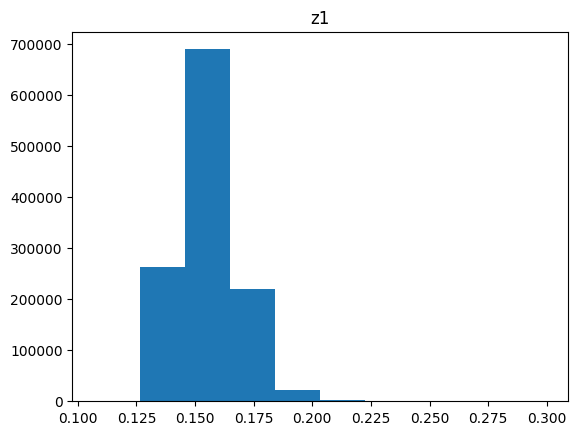

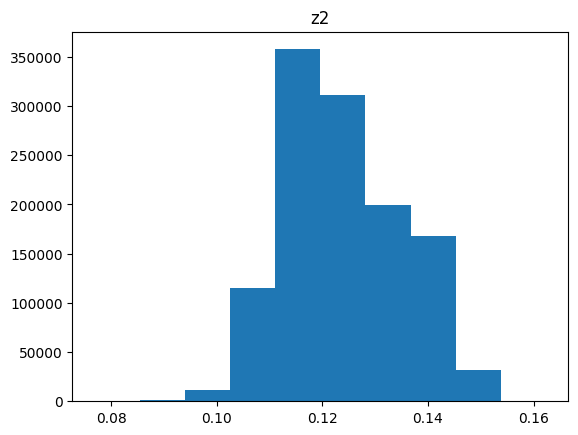

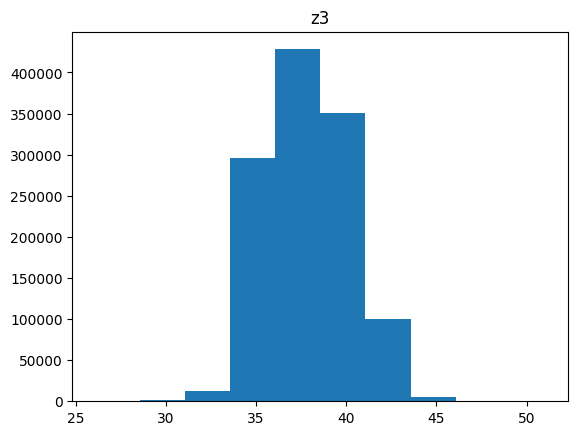

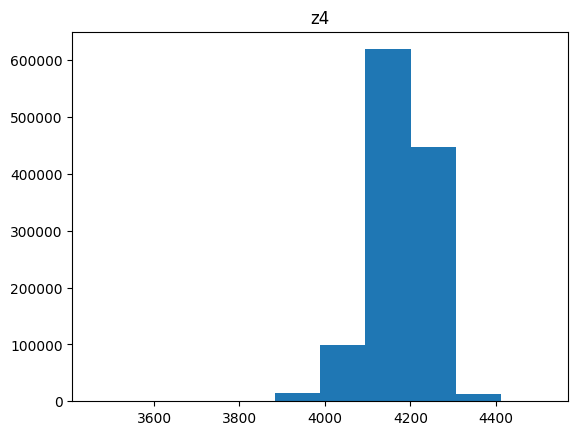

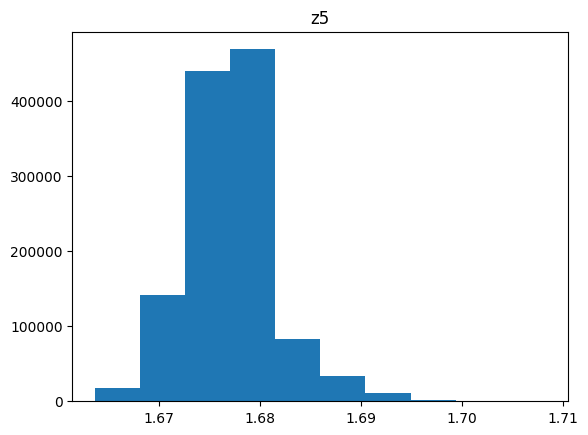

In [238]:
for i in columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()


In [239]:
"""def make_one_map(dataset): 
    x = dataset['x']
    y = dataset['y']
    z1 = dataset['z1']
    z2 = dataset['z2']
    z3 = dataset['z3']
    z4 = dataset['z4']
    z5 = dataset['z5']
    plt.scatter(x, y, c=z1)
    plt.scatter(x, y, c=z2)
    plt.scatter(x, y, c=z3)
    plt.scatter(x, y, c=z4)
    plt.scatter(x, y, c=z5)
    plt.colorbar(label='z')
    plt.show()

make_one_map(data)"""

"def make_one_map(dataset): \n    x = dataset['x']\n    y = dataset['y']\n    z1 = dataset['z1']\n    z2 = dataset['z2']\n    z3 = dataset['z3']\n    z4 = dataset['z4']\n    z5 = dataset['z5']\n    plt.scatter(x, y, c=z1)\n    plt.scatter(x, y, c=z2)\n    plt.scatter(x, y, c=z3)\n    plt.scatter(x, y, c=z4)\n    plt.scatter(x, y, c=z5)\n    plt.colorbar(label='z')\n    plt.show()\n\nmake_one_map(data)"

In [240]:
data['x'], Point_dataset['x'] 

def replace_closest_values(arr1, arr2):
    replaced_arr = np.zeros_like(arr2)

    for i, val in enumerate(arr2):
        closest_val = find_closest_value(val, arr1)
        replaced_arr[i] = closest_val

    return replaced_arr

def find_closest_value(val, arr):
    return arr[np.abs(arr - val).argmin()]



Point_dataset_new_x = replace_closest_values(data['x'], Point_dataset['x'])
Point_dataset_new_y = replace_closest_values(data['y'], Point_dataset['y'])

from sklearn.metrics import r2_score

r2_x = r2_score(Point_dataset['x'], Point_dataset_new_x)
r2_y = r2_score(Point_dataset['y'], Point_dataset_new_y)
r2_x, r2_y

(0.9999982339488196, 0.9999760306402811)

In [241]:
Point_dataset['x'] = Point_dataset_new_x
Point_dataset['y'] = Point_dataset_new_y
Point_dataset

,x,y,z
0,44226.71,35592.00,14.97
1,60001.71,26167.00,14.08
2,44301.71,35292.00,14.26
3,52776.71,33442.00,15.35
4,49639.21,30692.00,14.42
...,...,...,...
436,65189.21,26842.00,9.37
437,50026.71,40617.00,7.64
438,43839.21,35117.00,14.62
439,71489.21,25142.00,11.01


In [242]:
data2 = pd.merge(data, Point_dataset, how='inner', left_on=['x', 'y'], right_on=['x', 'y'])
data2, data2.corr()

(           x        y   z1   z2    z3      z4   z5     z
 0   60551.71 24542.00 0.16 0.11 35.08 4122.22 1.68 18.35
 1   62401.71 24692.00 0.15 0.11 38.56 4144.41 1.68 17.45
 2   68426.71 25492.00 0.14 0.13 36.60 4248.91 1.68 12.48
 3   60664.21 25667.00 0.15 0.11 37.93 4188.44 1.68 15.89
 4   60239.21 25992.00 0.15 0.11 36.91 4179.92 1.68 13.78
 ..       ...      ...  ...  ...   ...     ...  ...   ...
 427 45789.21 39567.00 0.15 0.12 36.52 4184.29 1.68 14.31
 428 57439.21 40492.00 0.16 0.12 39.77 4231.93 1.68 18.22
 429 50026.71 40617.00 0.16 0.14 41.53 4174.12 1.67  7.64
 430 55976.71 42117.00 0.15 0.12 40.09 4201.04 1.68 12.77
 431 51551.71 46317.00 0.16 0.13 36.59 4175.95 1.68 16.90
 
 [432 rows x 8 columns],
        x     y    z1    z2    z3    z4    z5     z
 x   1.00 -0.50 -0.47  0.10 -0.66  0.45 -0.33 -0.31
 y  -0.50  1.00  0.24 -0.08  0.36 -0.20  0.23  0.23
 z1 -0.47  0.24  1.00  0.08  0.42 -0.92  0.07 -0.00
 z2  0.10 -0.08  0.08  1.00 -0.24 -0.04 -0.33 -0.79
 z3 -0.66  0.36  

In [270]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

x = data2[columns]
y = data2['z']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
regr = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mse)
models, prediction = regr.fit(Xtrain, Xtest, ytrain, ytest)
models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_squared_error
Model,,,,,
XGBRegressor,0.92,0.93,0.84,0.17,0.71
HistGradientBoostingRegressor,0.91,0.91,0.93,0.41,0.86
LGBMRegressor,0.90,0.90,0.97,0.10,0.94
RandomForestRegressor,0.89,0.90,0.98,1.48,0.96
GradientBoostingRegressor,0.88,0.89,1.04,0.47,1.08
BaggingRegressor,0.88,0.89,1.04,0.26,1.09
ExtraTreesRegressor,0.87,0.88,1.07,0.60,1.14
AdaBoostRegressor,0.85,0.86,1.16,0.39,1.34
KNeighborsRegressor,0.80,0.82,1.35,0.02,1.81


In [244]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor()
model_cb.fit(Xtrain, ytrain)
y_model = model_cb.predict(Xtest)
mse(ytest, y_model)

Learning rate set to 0.034606
0:	learn: 2.6752877	total: 3.64ms	remaining: 3.64s
1:	learn: 2.6238499	total: 7.01ms	remaining: 3.5s
2:	learn: 2.5668107	total: 10.3ms	remaining: 3.43s
3:	learn: 2.5089796	total: 13.3ms	remaining: 3.31s
4:	learn: 2.4526552	total: 16.4ms	remaining: 3.26s
5:	learn: 2.4020231	total: 19.6ms	remaining: 3.25s
6:	learn: 2.3502568	total: 23.1ms	remaining: 3.28s
7:	learn: 2.3022299	total: 26ms	remaining: 3.23s
8:	learn: 2.2533805	total: 28.9ms	remaining: 3.18s
9:	learn: 2.2083869	total: 31.5ms	remaining: 3.12s
10:	learn: 2.1623409	total: 34.2ms	remaining: 3.07s
11:	learn: 2.1215122	total: 37ms	remaining: 3.05s
12:	learn: 2.0782836	total: 40.7ms	remaining: 3.09s
13:	learn: 2.0406159	total: 43.9ms	remaining: 3.09s
14:	learn: 2.0009040	total: 47.1ms	remaining: 3.09s
15:	learn: 1.9655377	total: 50.3ms	remaining: 3.09s
16:	learn: 1.9327850	total: 53.6ms	remaining: 3.1s
17:	learn: 1.8937586	total: 56.6ms	remaining: 3.09s
18:	learn: 1.8585015	total: 59.9ms	remaining: 3.09

0.9918574519781536

In [254]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

xgb = XGBRegressor()
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('xgb', xgb)])
param_grid_xgb = {
    'xgb__n_estimators': [100, 500, 1000, 1500],
    'xgb__learning_rate': [1, 0.1, 0.05, 0.01],
    'xgb__max_depth': [3, 5, 10]
}

grid_search_xgb = GridSearchCV(estimator=pipe_xgb, param_grid=param_grid_xgb, cv=5)

grid_search_xgb.fit(Xtrain, ytrain)


hgbr = HistGradientBoostingRegressor()

pipe_hgbr = Pipeline([('scaler', StandardScaler()), ('hgbr', hgbr)])
param_grid_hgbr = {
    'hgbr__min_samples_leaf': [1, 3, 5],
    'hgbr__learning_rate': [1, 0.1, 0.01],
    'hgbr__max_depth': [3, 5, 10],
    'hgbr__l2_regularization': [0.1, 0.01, 0.001]
}

grid_search_hgbr = GridSearchCV(estimator=pipe_hgbr, param_grid=param_grid_hgbr, cv=5)

grid_search_hgbr.fit(Xtrain, ytrain)

print("best_params_xgb:", grid_search_xgb.best_params_, '\n'
      'best_score_xgb:', grid_search_xgb.best_score_)
print("best_params_hgbr:", grid_search_hgbr.best_params_, '\n'
      'best_score_hgbr:', grid_search_hgbr.best_score_)




best_params_xgb: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 10, 'xgb__n_estimators': 1500} 
best_score_xgb: 0.8804732674767994
best_params_hgbr: {'hgbr__l2_regularization': 0.1, 'hgbr__learning_rate': 0.1, 'hgbr__max_depth': 10, 'hgbr__min_samples_leaf': 5} 
best_score_hgbr: 0.8739543381690421


In [255]:
xgb = XGBRegressor(learning_rate=grid_search_xgb.best_params_['xgb__learning_rate'],
                   max_depth=grid_search_xgb.best_params_['xgb__max_depth'],
                   n_estimators=grid_search_xgb.best_params_['xgb__n_estimators'])
xgb.fit(Xtrain, ytrain)
ypred = xgb.predict(Xtest)
print(mse(ypred, ytest))

hgbr = HistGradientBoostingRegressor(l2_regularization=grid_search_hgbr.best_params_['hgbr__l2_regularization'], learning_rate=0.1, max_depth=10, min_samples_leaf=5)
hgbr.fit(Xtrain, ytrain)
ypred = hgbr.predict(Xtest)
print(mse(ypred, ytest))

0.7541533827056484
0.8038738258524457


In [287]:
xgb_bp = XGBRegressor(learning_rate=grid_search_xgb.best_params_['xgb__learning_rate'],
                    max_depth=grid_search_xgb.best_params_['xgb__max_depth'],
                    n_estimators=grid_search_xgb.best_params_['xgb__n_estimators'])

hgbr_bp = HistGradientBoostingRegressor(l2_regularization=grid_search_hgbr.best_params_['hgbr__l2_regularization'],
                                        learning_rate=grid_search_hgbr.best_params_['hgbr__learning_rate'],
                                        max_depth=grid_search_hgbr.best_params_['hgbr__max_depth'],
                                        min_samples_leaf=grid_search_hgbr.best_params_['hgbr__min_samples_leaf'])

vot_reg = VotingRegressor(estimators = [('xgb_bp', xgb_bp), ('hgbr_bp', hgbr_bp)])

vot_reg.fit(Xtrain, ytrain)
ypred = vot_reg.predict(Xtest)
print(mse(ypred, ytest), r2_score(ypred, ytest))

from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(vot_reg, Xtrain, ytrain, cv=10, scoring='r2')
scores_test = cross_val_score(vot_reg, Xtest, ytest, cv=10, scoring='r2')

print(scores_test.mean(), scores_train.mean())
scores_test, scores_train

0.7206462238500785 0.9095631981242474
0.8411923485381951 0.8878235605891728


(array([0.79151975, 0.94828829, 0.8559067 , 0.90789323, 0.77954182,
        0.91773068, 0.55063951, 0.89468521, 0.80895933, 0.95675896]),
 array([0.83312213, 0.89199161, 0.93068837, 0.92477096, 0.91861152,
        0.90585224, 0.9045134 , 0.88993102, 0.87533242, 0.80342194]))

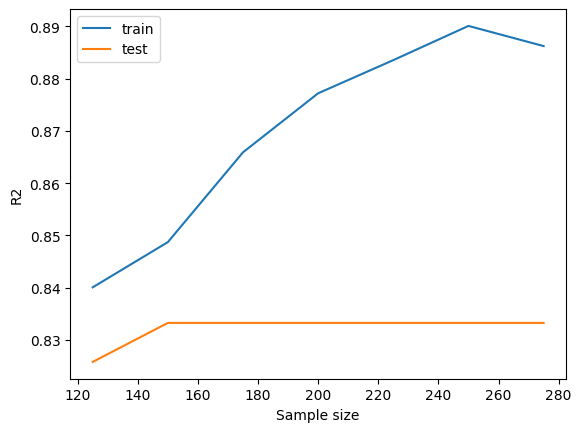

In [294]:
train_scores = []
test_scores = []

sample_sizes = np.arange(125, 300, 25)

for size in sample_sizes:
    Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)
    Xtrain = Xtrain[:size]
    ytrain = ytrain[:size]
    Xtest = Xtest[:size]
    ytest = ytest[:size]
    train_score = cross_val_score(vot_reg, Xtrain, ytrain, cv=5, scoring='r2')
    test_score = cross_val_score(vot_reg, Xtest, ytest, cv=5, scoring='r2')
    train_scores.append(train_score.mean())
    test_scores.append(test_score.mean())

plt.plot(sample_sizes, train_scores, label='train')
plt.plot(sample_sizes, test_scores, label='test')
plt.xlabel('Sample size')
plt.ylabel('R2')
plt.legend()
plt.show()


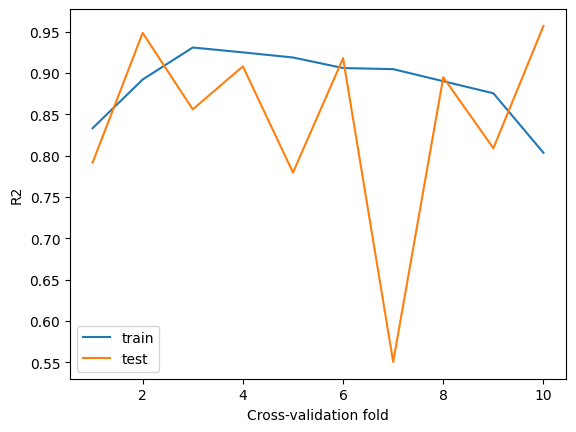

In [288]:
plt.plot(range(1, 11), scores_train, label='train')
plt.plot(range(1, 11), scores_test, label='test')
plt.xlabel('Cross-validation fold')
plt.ylabel('R2')
plt.legend()
plt.show()

In [258]:
'''xgb_bm = grid_search_xgb.best_estimator_
hgbr_bm = grid_search_hgbr.best_estimator_

vot_reg = VotingRegressor(estimators = [('xgb_bm', xgb_bm), ('hgbr_bm', hgbr_bm)])

vot_reg.fit(Xtrain, ytrain)
ypred = vot_reg.predict(Xtest)
mse(ypred, ytest)'''

0.7225311816739272

In [259]:
f1 = pd.merge(data, Point_dataset, how='left', left_on=['x', 'y'], right_on=['x', 'y'])
#f1.info(), data.info(), Point_dataset.info()
f1_new = f1[f1['z'].isnull()]
f1_new, data2
#~

#f1_new = f1[f1.z == np.nan]
#f1_new = f1.dropna(subset=['z'])
#f1_new['z'].unique()
#f1_nan = f1.drop()
#f1_new = f1_new[f1_new['z'] < 5]
#f1_new.info(), f1_new['z'].unique()
#x = data2[columns]
#y = data2['z']


(               x        y   z1   z2    z3      z4   z5   z
 0       68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68 NaN
 1       68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68 NaN
 2       68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68 NaN
 3       68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68 NaN
 4       68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68 NaN
 ...          ...      ...  ...  ...   ...     ...  ...  ..
 1196458 53239.21 46942.00 0.17 0.11 41.70 4022.73 1.68 NaN
 1196459 53251.71 46942.00 0.17 0.11 37.71 4022.96 1.68 NaN
 1196460 53264.21 46942.00 0.17 0.11 37.66 4022.32 1.68 NaN
 1196461 53276.71 46942.00 0.17 0.11 37.21 4023.46 1.68 NaN
 1196462 53289.21 46942.00 0.17 0.11 40.99 4016.93 1.68 NaN
 
 [1196031 rows x 8 columns],
            x        y   z1   z2    z3      z4   z5     z
 0   60551.71 24542.00 0.16 0.11 35.08 4122.22 1.68 18.35
 1   62401.71 24692.00 0.15 0.11 38.56 4144.41 1.68 17.45
 2   68426.71 25492.00 0.14 0.13 36.60 4248.91 1.68 12.48
 3   60664.21 256

In [263]:
X = f1_new[columns]
y = f1['z']
y = vot_reg.predict(X)

In [ ]:
X

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68
...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68


In [ ]:
y = pd.DataFrame(y.reshape(-1, 1))
y

,0
0,13.53
1,13.53
2,13.52
3,13.53
4,13.53
...,...
1196026,16.41
1196027,16.39
1196028,15.48
1196029,15.48


In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X, y

(               x        y   z1   z2    z3      z4   z5
 0       68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68
 1       68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68
 2       68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68
 3       68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68
 4       68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68
 ...          ...      ...  ...  ...   ...     ...  ...
 1196026 53239.21 46942.00 0.17 0.11 41.70 4022.73 1.68
 1196027 53251.71 46942.00 0.17 0.11 37.71 4022.96 1.68
 1196028 53264.21 46942.00 0.17 0.11 37.66 4022.32 1.68
 1196029 53276.71 46942.00 0.17 0.11 37.21 4023.46 1.68
 1196030 53289.21 46942.00 0.17 0.11 40.99 4016.93 1.68
 
 [1196031 rows x 7 columns],
             0
 0       13.53
 1       13.53
 2       13.52
 3       13.53
 4       13.53
 ...       ...
 1196026 16.41
 1196027 16.39
 1196028 15.48
 1196029 15.48
 1196030 15.51
 
 [1196031 rows x 1 columns])

In [ ]:
F1 = pd.concat([X, y], axis=1, ignore_index=False)
X, y, F1

(               x        y   z1   z2    z3      z4   z5
 0       68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68
 1       68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68
 2       68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68
 3       68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68
 4       68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68
 ...          ...      ...  ...  ...   ...     ...  ...
 1196026 53239.21 46942.00 0.17 0.11 41.70 4022.73 1.68
 1196027 53251.71 46942.00 0.17 0.11 37.71 4022.96 1.68
 1196028 53264.21 46942.00 0.17 0.11 37.66 4022.32 1.68
 1196029 53276.71 46942.00 0.17 0.11 37.21 4023.46 1.68
 1196030 53289.21 46942.00 0.17 0.11 40.99 4016.93 1.68
 
 [1196031 rows x 7 columns],
             0
 0       13.53
 1       13.53
 2       13.52
 3       13.53
 4       13.53
 ...       ...
 1196026 16.41
 1196027 16.39
 1196028 15.48
 1196029 15.48
 1196030 15.51
 
 [1196031 rows x 1 columns],
                x        y   z1   z2    z3      z4   z5     0
 0       68239.21 24467.

In [ ]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196031 entries, 0 to 1196030
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196031 non-null  float32
 1   y       1196031 non-null  float32
 2   z1      1196031 non-null  float32
 3   z2      1196031 non-null  float32
 4   z3      1196031 non-null  float32
 5   z4      1196031 non-null  float32
 6   z5      1196031 non-null  float32
 7   0       1196031 non-null  float32
dtypes: float32(8)
memory usage: 36.5 MB


In [ ]:
#F1.dropna(axis='index', inplace=True)
F1.rename(columns={0: 'f1'}, inplace=True)
data2.rename(columns={'z': 'f1'}, inplace=True)
F1 = pd.concat([F1, data2], axis=0)
F1

,x,y,z1,z2,z3,z4,z5,f1
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68,13.53
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68,13.53
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68,13.52
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68,13.53
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68,13.53
...,...,...,...,...,...,...,...,...
427,45789.21,39567.00,0.15,0.12,36.52,4184.29,1.68,14.31
428,57439.21,40492.00,0.16,0.12,39.77,4231.93,1.68,18.22
429,50026.71,40617.00,0.16,0.14,41.53,4174.12,1.67,7.64
430,55976.71,42117.00,0.15,0.12,40.09,4201.04,1.68,12.77


In [ ]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196463 entries, 0 to 431
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196463 non-null  float32
 1   y       1196463 non-null  float32
 2   z1      1196463 non-null  float32
 3   z2      1196463 non-null  float32
 4   z3      1196463 non-null  float32
 5   z4      1196463 non-null  float32
 6   z5      1196463 non-null  float32
 7   f1      1196463 non-null  float64
dtypes: float32(7), float64(1)
memory usage: 50.2 MB


In [ ]:
F1.to_csv('F1.csv')

In [ ]:
"""F1 = pd.concat([X, y], axis=1)
F1 = F1[~F1[0].isnull()]

F1 = F1.to_csv('F1.csv')
F1"""

"F1 = pd.concat([X, y], axis=1)\nF1 = F1[~F1[0].isnull()]\n\nF1 = F1.to_csv('F1.csv')\nF1"

In [ ]:
F1__try = pd.read_csv('F1.csv')
F1__try, F1__try.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196463 entries, 0 to 1196462
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1196463 non-null  int64  
 1   x           1196463 non-null  float64
 2   y           1196463 non-null  float64
 3   z1          1196463 non-null  float64
 4   z2          1196463 non-null  float64
 5   z3          1196463 non-null  float64
 6   z4          1196463 non-null  float64
 7   z5          1196463 non-null  float64
 8   f1          1196463 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 82.2 MB


(         Unnamed: 0        x        y   z1   z2    z3      z4   z5    f1
 0                 0 68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68 13.53
 1                 1 68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68 13.53
 2                 2 68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68 13.52
 3                 3 68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68 13.53
 4                 4 68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68 13.53
 ...             ...      ...      ...  ...  ...   ...     ...  ...   ...
 1196458         427 45789.21 39567.00 0.15 0.12 36.52 4184.29 1.68 14.31
 1196459         428 57439.21 40492.00 0.16 0.12 39.77 4231.93 1.68 18.22
 1196460         429 50026.71 40617.00 0.16 0.14 41.53 4174.12 1.67  7.64
 1196461         430 55976.71 42117.00 0.15 0.12 40.09 4201.04 1.68 12.77
 1196462         431 51551.71 46317.00 0.16 0.13 36.59 4175.95 1.68 16.90
 
 [1196463 rows x 9 columns],
 None)

In [ ]:
F1__try

,Unnamed: 0,x,y,z1,z2,z3,z4,z5,f1
0,0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68,13.53
1,1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68,13.53
2,2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68,13.52
3,3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68,13.53
4,4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68,13.53
...,...,...,...,...,...,...,...,...,...
1196458,427,45789.21,39567.00,0.15,0.12,36.52,4184.29,1.68,14.31
1196459,428,57439.21,40492.00,0.16,0.12,39.77,4231.93,1.68,18.22
1196460,429,50026.71,40617.00,0.16,0.14,41.53,4174.12,1.67,7.64
1196461,430,55976.71,42117.00,0.15,0.12,40.09,4201.04,1.68,12.77


In [ ]:
Result_schedule = pd.DataFrame(import_dataset_from_file('Result_schedule.txt'))
Result_schedule

,x,y,z
0,68239.21,24467.00,NaN
1,68251.71,24467.00,NaN
2,68264.21,24467.00,NaN
3,68276.71,24467.00,NaN
4,68289.21,24467.00,NaN
...,...,...,...
1196585,53264.21,46942.00,NaN
1196586,53276.71,46942.00,NaN
1196587,53289.21,46942.00,NaN
1196588,53301.71,46942.00,NaN
